# Lab | Pandas

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

The data includes information such as customer ID, state, gender, education, income, and other variables that can be used to perform various analyses.

Throughout the lab, we will be using the pandas library in Python to manipulate and analyze the data. Pandas is a powerful library that provides various data manipulation and analysis tools, including the ability to load and manipulate data from a variety of sources, including CSV files.

### Data Description

- Customer - Customer ID

- ST - State where customers live

- Gender - Gender of the customer

- Education - Background education of customers 

- Customer Lifetime Value - Customer lifetime value(CLV) is the total revenue the client will derive from their entire relationship with a customer. In other words, is the predicted or calculated value of a customer over their entire duration as a policyholder with the insurance company. It is an estimation of the net profit that the insurance company expects to generate from a customer throughout their relationship with the company. Customer Lifetime Value takes into account factors such as the duration of the customer's policy, premium payments, claim history, renewal likelihood, and potential additional services or products the customer may purchase. It helps insurers assess the long-term profitability and value associated with retaining a particular customer.

- Income - Customers income

- Monthly Premium Auto - Amount of money the customer pays on a monthly basis as a premium for their auto insurance coverage. It represents the recurring cost that the insured person must pay to maintain their insurance policy and receive coverage for potential damages, accidents, or other covered events related to their vehicle.

- Number of Open Complaints - Number of complaints the customer opened

- Policy Type - There are three type of policies in car insurance (Corporate Auto, Personal Auto, and Special Auto)

- Vehicle Class - Type of vehicle classes that customers have Two-Door Car, Four-Door Car SUV, Luxury SUV, Sports Car, and Luxury Car

- Total Claim Amount - the sum of all claims made by the customer. It represents the total monetary value of all approved claims for incidents such as accidents, theft, vandalism, or other covered events.


External Resources: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

## Challenge 1: Understanding the data

In this challenge, you will use pandas to explore a given dataset. Your task is to gain a deep understanding of the data by analyzing its characteristics, dimensions, and statistical properties.

- Identify the dimensions of the dataset by determining the number of rows and columns it contains.
- Determine the data types of each column and evaluate whether they are appropriate for the nature of the variable. You should also provide suggestions for fixing any incorrect data types.
- Identify the number of unique values for each column and determine which columns appear to be categorical. You should also describe the unique values of each categorical column and the range of values for numerical columns, and give your insights.
- Compute summary statistics such as mean, median, mode, standard deviation, and quartiles to understand the central tendency and distribution of the data for numerical columns. You should also provide your conclusions based on these summary statistics.
- Compute summary statistics for categorical columns and providing your conclusions based on these statistics.

In [18]:
# Your code here
import pandas as pd

url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
df = pd.read_csv(url)

filas, columnas = df.shape

print("Numero de filas:", filas)
print("Numero de columnas:", columnas)

print("\nTipos de datos:")
print(df.dtypes)

print("\nValores unicos por columna:")
print(df.nunique())

categorical_cols = df.select_dtypes(include="category").columns

print("\nValores unicos en columnas categricas:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

numeric_cols = df.select_dtypes(include='number').columns

print("\nEstadísticas descriptivas para columnas numéricas:")
print(df[numeric_cols].describe())

print("\nModa de columnas numéricas:")
print(df[numeric_cols].mode().iloc[0])

print("\nEstadísticas para columnas categóricas:")
for col in categorical_cols:
    print(f"\nColumna: {col}")
    print(df[col].value_counts())
    print("Moda:", df[col].mode().iloc[0])

Numero de filas: 4008
Numero de columnas: 11

Tipos de datos:
Customer                      object
ST                            object
GENDER                        object
Education                     object
Customer Lifetime Value       object
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints     object
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object

Valores unicos por columna:
Customer                     1071
ST                              8
GENDER                          5
Education                       6
Customer Lifetime Value      1027
Income                        774
Monthly Premium Auto          132
Number of Open Complaints       6
Policy Type                     3
Vehicle Class                   6
Total Claim Amount            761
dtype: int64

Valores unicos en columnas categricas:

Estadísticas descriptivas para columnas numéricas:
         

## Challenge 2: analyzing the data

### Exercise 1

The marketing team wants to know the top 5 less common customer locations. Create a pandas Series object that contains the customer locations and their frequencies, and then retrieve the top 5 less common locations in ascending order.

In [19]:
# Your code here

import pandas as pd

url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
df = pd.read_csv(url)

location_counts = df['ST'].value_counts(ascending=True)

# Mostrar las 5 ubicaciones menos comunes
top_5_less_common_locations = location_counts.head(5)

print("Top 5 ubicaciones menos comunes:")
print(top_5_less_common_locations)


Top 5 ubicaciones menos comunes:
ST
AZ             25
WA             30
Washington     81
Nevada         98
Cali          120
Name: count, dtype: int64


### Exercise 2

The sales team wants to know the total number of policies sold for each type of policy. Create a pandas Series object that contains the policy types and their total number of policies sold, and then retrieve the policy type with the highest number of policies sold.

*Hint:*
- *Using value_counts() method simplifies this analysis.*
- *Futhermore, there is a method that returns the index of the maximum value in a column or row.*


In [20]:
# Your code here

import pandas as pd

# Cargar datos desde el CSV
url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
df = pd.read_csv(url)

policy_counts = df['Policy Type'].value_counts()

print("Número de pólizas por tipo:")
print(policy_counts)

most_sold_policy = policy_counts.idxmax()
most_sold_count = policy_counts.max()

print(f"\nEl tipo de póliza con más ventas es: {most_sold_policy} ({most_sold_count} pólizas)")

Número de pólizas por tipo:
Policy Type
Personal Auto     780
Corporate Auto    234
Special Auto       57
Name: count, dtype: int64

El tipo de póliza con más ventas es: Personal Auto (780 pólizas)


### Exercise 3

The sales team wants to know if customers with Personal Auto have a lower income than those with Corporate Auto. How does the average income compare between the two policy types?

- Use *loc* to create two dataframes: one containing only Personal Auto policies and one containing only Corporate Auto policies.
- Calculate the average income for each policy.
- Print the results.

In [21]:
# Your code here

# Filtrar clientes con pólizas Personal Auto
personal_auto_df = df.loc[df['Policy Type'] == 'Personal Auto']

# Filtrar clientes con pólizas Corporate Auto
corporate_auto_df = df.loc[df['Policy Type'] == 'Corporate Auto']

avg_income_personal = personal_auto_df['Income'].mean()
avg_income_corporate = corporate_auto_df['Income'].mean()

print(f"Ingreso promedio - Personal Auto: ${avg_income_personal:,.2f}")
print(f"Ingreso promedio - Corporate Auto: ${avg_income_corporate:,.2f}")

if avg_income_personal < avg_income_corporate:
    print("\n✅ Los clientes con pólizas Personal Auto tienen un ingreso promedio más bajo.")
else:
    print("\n❌ Los clientes con pólizas Personal Auto no tienen un ingreso promedio más bajo.")

Ingreso promedio - Personal Auto: $38,180.70
Ingreso promedio - Corporate Auto: $41,390.31

✅ Los clientes con pólizas Personal Auto tienen un ingreso promedio más bajo.


### Bonus: Exercise 4


Your goal is to identify customers with a high policy claim amount.

Instructions:

- Review again the statistics for total claim amount to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount data. 

*Note: When analyzing data, we often want to focus on certain groups of values to gain insights. Percentiles are a useful tool to help us define these groups. A percentile is a measure that tells us what percentage of values in a dataset are below a certain value. For example, the 75th percentile represents the value below which 75% of the data falls. Similarly, the 25th percentile represents the value below which 25% of the data falls. When we talk about the top 25%, we are referring to the values that fall above the 75th percentile, which represent the top quarter of the data. On the other hand, when we talk about the bottom 25%, we are referring to the values that fall below the 25th percentile, which represent the bottom quarter of the data. By focusing on these groups, we can identify patterns and trends that may be useful for making decisions and taking action.*

*Hint: look for a method that gives you the percentile or quantile 0.75 and 0.25 for a Pandas Series.*

*Hint 2: check `Boolean selection according to the values of a single column` in https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9*

Estadísticas de Total Claim Amount:
count    1071.000000
mean      404.986909
std       293.027260
min         0.382107
25%       202.157702
50%       354.729129
75%       532.800000
max      2893.239678
Name: Total Claim Amount, dtype: float64

El percentil 75 para el Total Claim Amount es: $532.80

Estadísticas de los clientes con mayores montos en reclamaciones:
             Income  Monthly Premium Auto  Total Claim Amount
count    264.000000            264.000000          264.000000
mean   23677.344697            165.193182          782.228263
std    27013.483721            623.930992          292.751640
min        0.000000             63.000000          537.600000
25%        0.000000             99.000000          606.521741
50%    18807.000000            114.000000          679.597985
75%    42423.750000            133.250000          851.400000
max    99316.000000          10202.000000         2893.239678


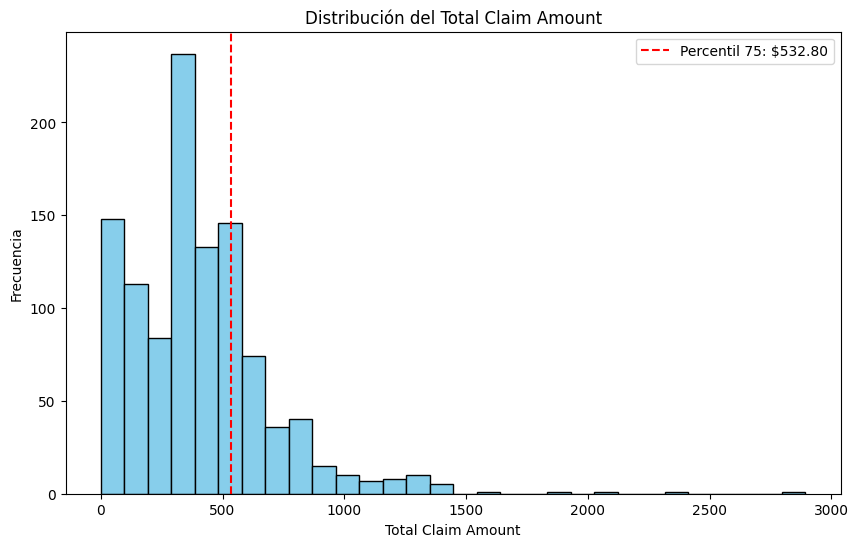

In [ ]:
# Your code here

# Estadísticas del monto total de reclamaciones
print("Estadísticas de Total Claim Amount:")
print(df['Total Claim Amount'].describe())

# Calcular el percentil 75
percentile_75 = df['Total Claim Amount'].quantile(0.75)

print(f"\nEl percentil 75 para el Total Claim Amount es: ${percentile_75:,.2f}")

# Filtrar los clientes con montos de reclamación mayores al percentil 75
high_claims_df = df[df['Total Claim Amount'] > percentile_75]

# Estadísticas resumidas para los clientes con mayores reclamaciones
print("\nEstadísticas de los clientes con mayores montos en reclamaciones:")
print(high_claims_df.describe())

import matplotlib.pyplot as plt

# Graficar la distribución de los montos de reclamación
plt.figure(figsize=(10, 6))
plt.hist(df['Total Claim Amount'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=percentile_75, color='red', linestyle='--', label=f'Percentil 75: ${percentile_75:,.2f}')
plt.title('Distribución del Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()